In [ ]:
import pandas as pd

# 1. Load your original CSV
df = pd.read_csv("/content/newfiltered_posts.csv")

# 2. Filter out rows where post_type is "question"
df_answers_only = df[df["post_type"] == "answer"].copy()

# 3. Write the resulting DataFrame to a new CSV
#    This CSV will keep the original columns but contain only answer rows.
df_answers_only.to_csv("answers_only.csv", index=False)

print("Filtered CSV created with only 'answer' rows!")

Filtered CSV created with only 'answer' rows!


In [ ]:
import pandas as pd

# ---------- configuration ----------
INPUT_FILE  = "answers_only.csv"          # path to the merged file
OUTPUT_FILE = "filtered_posts.csv"    # where you want the result saved
KEYWORDS    = ["license", "apl", "gpl", "apache", "nethack", "mit","lgpl"]
# ------------------------------------

# Build a single regex pattern like  "license|apl|gpl|..."
pattern = "|".join(KEYWORDS)

# 1) Read the merged CSV
df = pd.read_csv(INPUT_FILE)

# 2) Keep only rows where *any* cell contains one of the keywords
mask = df.apply(
    lambda row: row.astype(str).str.contains(pattern, case=False, regex=True).any(),
    axis=1
)
filtered_df = df[mask]

# 3) Save the filtered data
filtered_df.to_csv(OUTPUT_FILE, index=False)

print(f"Saved {len(filtered_df)} rows to {OUTPUT_FILE}")


Saved 342 rows to filtered_posts.csv


In [ ]:
import pandas as pd
from transformers import pipeline


In [ ]:
df = pd.read_csv("answers_only.csv")

In [ ]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=0)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove non-printable / control chars:
    text = "".join(ch for ch in text if ch.isprintable())
    return text

df["question_body"] = df["question_body"].apply(clean_text)
df["answer_body"]   = df["answer_body"].apply(clean_text)


In [ ]:
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    device=-1  # forces CPU usage
)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
!pip install --upgrade transformers datasets torch torchvision

In [ ]:
!pip install pandas numpy torch transformers datasets

In [ ]:
!pip install --upgrade transformers datasets torch

In [ ]:
!pip install torchvision

In [ ]:
# 1. Load the CSV
import pandas as pd
df = pd.read_csv("answers_only.csv")

# (Optional) Check the first few rows/columns
print(df.head())
print(df.columns)

  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   
3    answer   297775     1369053456       297756   
4    answer    88430     1324123842        88366   

                                      question_title  \
0                         Icecast on linux using AAC   
1                           Are PDF files opensouce?   
2         How to delete private data from log files?   
3  How can I report a suspected copyright or trad...   
4   What is the legal status of libraries in Ubuntu?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   
3  <p><strong>The problem:</strong> The applicati...   
4  <p>I cannot find a good source of information ...   

             

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import pipeline
import torch


In [ ]:
summarizer = pipeline(
    "summarization",
    model="sshleifer/distilbart-cnn-12-6",
    device=0  # 0 for GPU; -1 for CPU
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [ ]:
# 1. Load the CSV
df = pd.read_csv("/content/answers_only.csv")

# (Optional) Check the first few rows/columns
print(df.head())
print(df.columns)

  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   
3    answer   297775     1369053456       297756   
4    answer    88430     1324123842        88366   

                                      question_title  \
0                         Icecast on linux using AAC   
1                           Are PDF files opensouce?   
2         How to delete private data from log files?   
3  How can I report a suspected copyright or trad...   
4   What is the legal status of libraries in Ubuntu?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   
3  <p><strong>The problem:</strong> The applicati...   
4  <p>I cannot find a good source of information ...   

             

In [ ]:
# 1. Load the CSV
df = pd.read_csv("/content/answers_only.csv")

# (Optional) Check the first few rows/columns
print(df.head())
print(df.columns)

  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   
3    answer   297775     1369053456       297756   
4    answer    88430     1324123842        88366   

                                      question_title  \
0                         Icecast on linux using AAC   
1                           Are PDF files opensouce?   
2         How to delete private data from log files?   
3  How can I report a suspected copyright or trad...   
4   What is the legal status of libraries in Ubuntu?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   
3  <p><strong>The problem:</strong> The applicati...   
4  <p>I cannot find a good source of information ...   

             

In [ ]:
!pip install sentence-transformers PyPDF2 pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 19.6 MB/s eta 0:00:00


In [ ]:
import os
import PyPDF2

license_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

def extract_text_from_pdf(pdf_path):
    """
    Reads a PDF file with PyPDF2 and returns the extracted text.
    """
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

licenses_dict = {}
for pdf_name in license_files:
    pdf_path = os.path.join('/content/', pdf_name)
    if os.path.isfile(pdf_path):
        extracted_text = extract_text_from_pdf(pdf_path)
        licenses_dict[pdf_name] = extracted_text
    else:
        print(f"Warning: file not found - {pdf_path}")
import os
import PyPDF2
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

###########################
# Step 1: Extract PDF text
###########################

def extract_text_from_pdf(pdf_path):
    """
    Reads a PDF file with PyPDF2 and returns the extracted text.
    """
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

license_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

licenses_dict = {}
for pdf_name in license_files:
    pdf_path = os.path.join('/content/', pdf_name)
    if os.path.isfile(pdf_path):
        extracted_text = extract_text_from_pdf(pdf_path)
        licenses_dict[pdf_name] = extracted_text
    else:
        print(f"Warning: file not found: {pdf_path}")

###############################
# Step 2: Embed & compare text
###############################

# Load the Sentence Transformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Read your CSV of forum posts
df = pd.read_csv("/content/answers_only.csv")

# Here we assume the column is named "answer_body"
text_column_name = "answer_body"

# Embed each license text once
license_embeddings = {}
for lic_name, lic_text in licenses_dict.items():
    emb = model.encode(lic_text)
    license_embeddings[lic_name] = emb

def compute_similarities(post_text):
    """
    Returns a dict of license_name -> similarity_score for a given forum post's text.
    """
    post_emb = model.encode(post_text).reshape(1, -1)
    similarities = {}
    for lic_name, lic_emb in license_embeddings.items():
        lic_emb_2d = lic_emb.reshape(1, -1)
        sim = cosine_similarity(post_emb, lic_emb_2d)[0][0]
        similarities[lic_name] = float(sim)
    return similarities

df["similarities"] = df[text_column_name].apply(compute_similarities)

# Expand dict of similarity scores into columns
for lic_name in license_files:
    df[lic_name] = df["similarities"].apply(lambda d: d.get(lic_name, 0.0))

# Drop the dictionary column if you want
df.drop(columns=["similarities"], inplace=True)

# View or save
print(df.head(3))
df.to_csv("/content/forum_posts_with_license_similarities.csv", index=False)


special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   

                               question_title  \
0                  Icecast on linux using AAC   
1                    Are PDF files opensouce?   
2  How to delete private data from log files?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   

                                         answer_body  \
0  <p>Icecast does not <em>officially</em> suppor...   
1  <p>The PDF format itself is freely usable and ...   
2  <p>Personally, I think people generally over-r...   

   Apache License, Version 2.0 – Open Source Initiative.pdf  \
0                                           0.202683          
1                 

In [ ]:
import os
import PyPDF2
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline

###########################################
# Step 1: Set up the summarization pipeline
###########################################
# We use a model like "facebook/bart-large-cnn" for summarization.
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

###########################################
# Step 2: Define a chunking and summarization function
###########################################
def summarize_long_text(text, max_chunk_words=300,
                        chunk_max_length=150, chunk_min_length=50,
                        final_max_length=130, final_min_length=30):
    """
    For a long text, split it into chunks (by word count),
    summarize each chunk, join the summaries and then summarize the joined text.

    Parameters:
      text (str): The text to summarize.
      max_chunk_words (int): Maximum words per chunk.
      chunk_max_length (int): max_length passed to summarizer for each chunk.
      chunk_min_length (int): min_length passed to summarizer for each chunk.
      final_max_length (int): max_length for final summary.
      final_min_length (int): min_length for final summary.

    Returns:
      final_summary (str): The final summarized text.
    """
    # Split text into words
    words = text.split()
    if not words:
        return ""

    chunks = []
    current_chunk = []
    for word in words:
        current_chunk.append(word)
        if len(current_chunk) >= max_chunk_words:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
    # Add any remaining words
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    # Summarize each chunk
    chunk_summaries = []
    for chunk in chunks:
        try:
            summary_list = summarizer(chunk, max_length=chunk_max_length,
                                        min_length=chunk_min_length, do_sample=False)
            chunk_summary = summary_list[0]['summary_text']
        except Exception as e:
            # In case summarization fails, fall back to the chunk itself
            print("Summarization error:", e)
            chunk_summary = chunk
        chunk_summaries.append(chunk_summary)

    # Combine chunk summaries and summarize them to get the final summary
    combined_summary_text = " ".join(chunk_summaries)
    try:
        final_summary_list = summarizer(combined_summary_text, max_length=final_max_length,
                                        min_length=final_min_length, do_sample=False)
        final_summary = final_summary_list[0]['summary_text']
    except Exception as e:
        print("Final summarization error:", e)
        final_summary = combined_summary_text
    return final_summary

###########################################
# Step 3: Extract text from license PDFs
###########################################
def extract_text_from_pdf(pdf_path):
    """
    Reads a PDF file and extracts its text.
    """
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

license_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

licenses_dict = {}
for pdf_name in license_files:
    pdf_path = os.path.join('/content/', pdf_name)
    if os.path.isfile(pdf_path):
        licenses_dict[pdf_name] = extract_text_from_pdf(pdf_path)
    else:
        print(f"Warning: file not found: {pdf_path}")

###########################################
# Step 4: Embed text using SentenceTransformer and compute similarity
###########################################
# Load the SentenceTransformer model
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Read your CSV of forum posts; assume forum text is in 'answer_body'
df = pd.read_csv("/content/answers_only.csv")
text_column_name = "answer_body"

# For each forum post, create a summary using the chunking function.
print("Summarizing forum posts...")
df["summary"] = df[text_column_name].apply(lambda x: summarize_long_text(x))

# Embed each license text once
license_embeddings = {}
for lic_name, lic_text in licenses_dict.items():
    license_embeddings[lic_name] = embedder.encode(lic_text)

def compute_similarities_from_summary(summary_text):
    """
    Compute cosine similarities between a summary and each license embedding.
    """
    summary_emb = embedder.encode(summary_text).reshape(1, -1)
    similarities = {}
    for lic_name, lic_emb in license_embeddings.items():
        sim = cosine_similarity(summary_emb, lic_emb.reshape(1, -1))[0][0]
        similarities[lic_name] = float(sim)
    return similarities

# Compute similarity scores for each summarized forum post
print("Computing similarity scores...")
df["similarities"] = df["summary"].apply(compute_similarities_from_summary)

# Expand the dictionary of similarities into separate columns (one per license PDF)
for lic_name in license_files:
    df[lic_name] = df["similarities"].apply(lambda d: d.get(lic_name, 0.0))

# Optionally drop the dictionary column
df.drop(columns=["similarities"], inplace=True)

# Preview the results and save the final DataFrame to CSV
print(df.head(3))
output_csv = "/content/forum_posts_summary_license_similarities.csv"
df.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")


Device set to use cuda:0


Summarizing forum posts...


Your max_length is set to 130, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)
Your max_length is set to 130, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 150, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 130, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
You

Computing similarity scores...
  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   

                               question_title  \
0                  Icecast on linux using AAC   
1                    Are PDF files opensouce?   
2  How to delete private data from log files?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   

                                         answer_body  \
0  <p>Icecast does not <em>officially</em> suppor...   
1  <p>The PDF format itself is freely usable and ...   
2  <p>Personally, I think people generally over-r...   

                                             summary  \
0  Icecast does not officially support AAC, but i...   
1

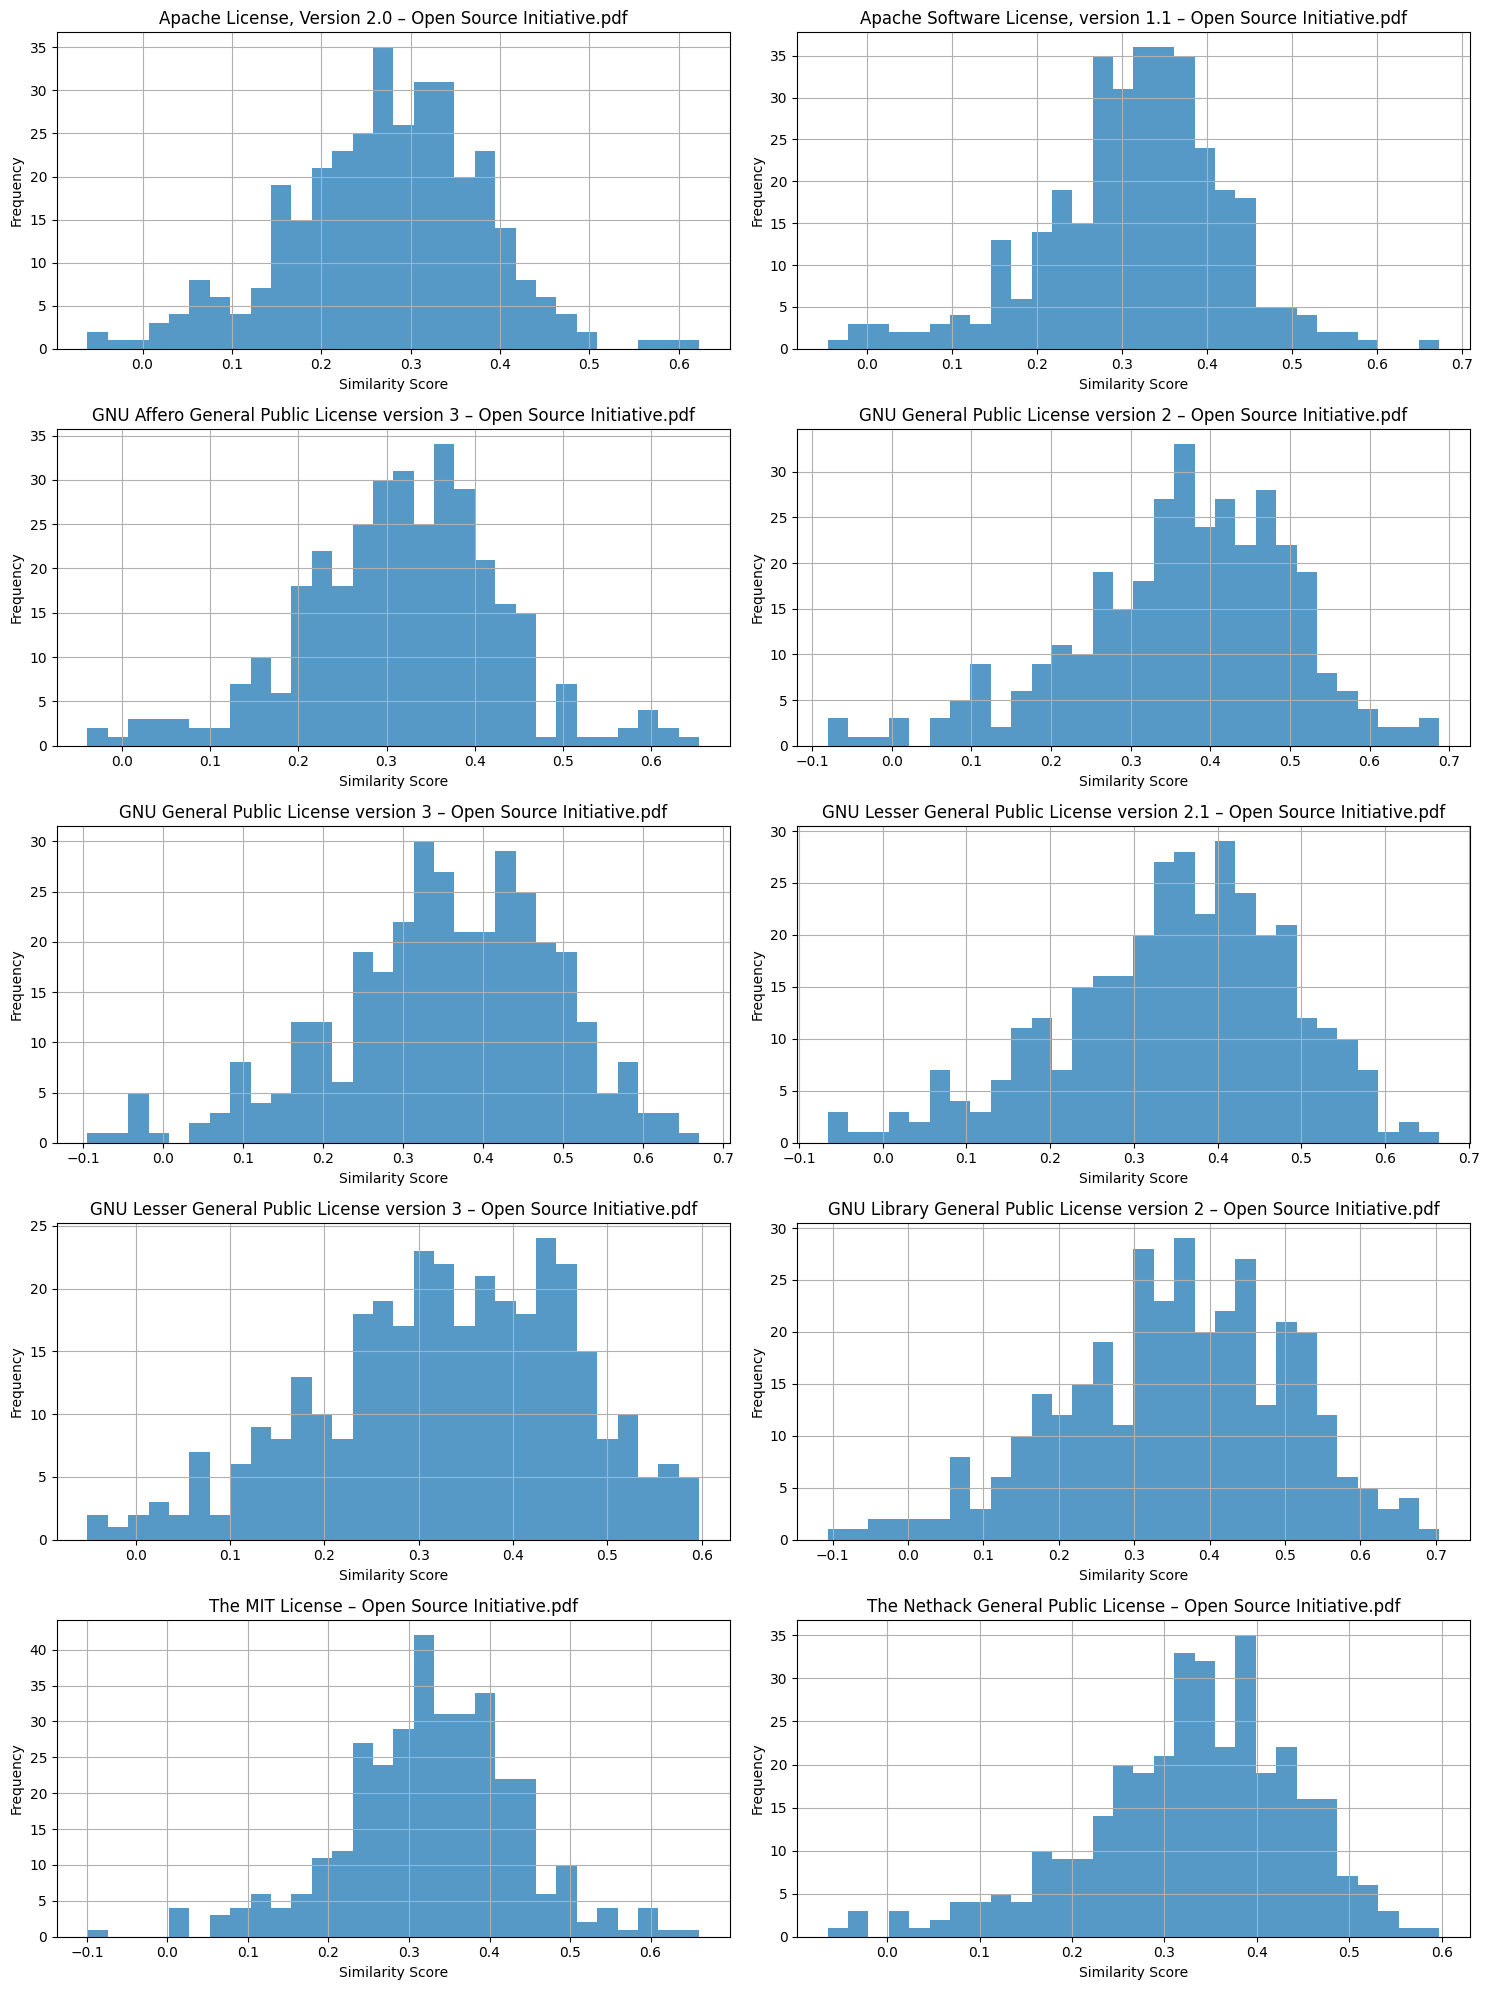

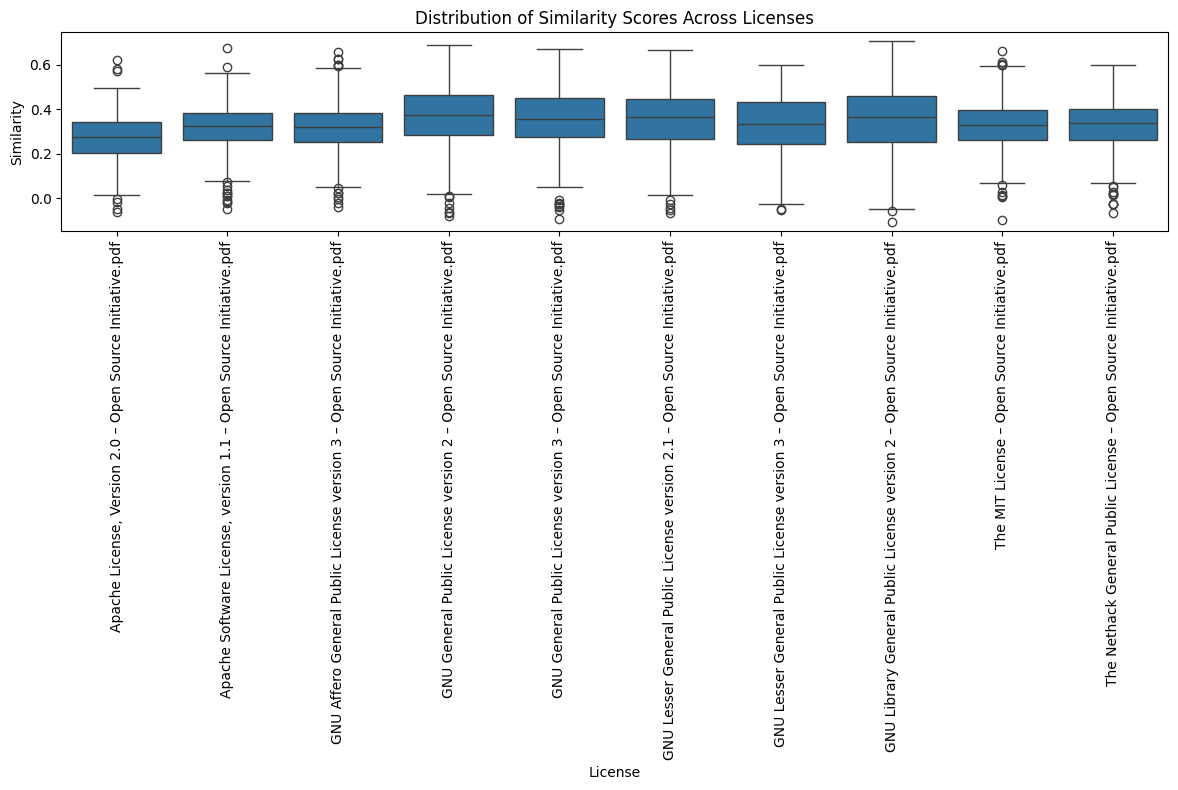

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_file = "/content/forum_posts_summary_license_similarities.csv"
df = pd.read_csv(csv_file)

# List of license PDF column names (adjust if your CSV has different column names)
license_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

#######################################
# Option 1: Plot individual histograms
#######################################
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for ax, lic in zip(axes, license_files):
    values = df[lic]
    ax.hist(values, bins=30, alpha=0.75)
    ax.set_title(lic)
    ax.set_xlabel("Similarity Score")
    ax.set_ylabel("Frequency")
    # Optionally add a grid
    ax.grid(True)

plt.tight_layout()
plt.show()

#######################################
# Option 2: Create a combined boxplot
#######################################
# Melt the DataFrame to get a long-form DataFrame that is easier to plot together
df_melted = df[license_files].melt(var_name="License", value_name="Similarity")

plt.figure(figsize=(12, 8))
sns.boxplot(x="License", y="Similarity", data=df_melted)
plt.xticks(rotation=90)
plt.title("Distribution of Similarity Scores Across Licenses")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import PyPDF2
from transformers import pipeline
import os


In [ ]:
df = pd.read_csv("/content/answers_only.csv")
print(df.head())


  post_type  post_id  creation_date  question_id  \
0    answer   581248     1422974434       548985   
1    answer   403491     1389367775       403482   
2    answer   275762     1364554173       275742   
3    answer   297775     1369053456       297756   
4    answer    88430     1324123842        88366   

                                      question_title  \
0                         Icecast on linux using AAC   
1                           Are PDF files opensouce?   
2         How to delete private data from log files?   
3  How can I report a suspected copyright or trad...   
4   What is the legal status of libraries in Ubuntu?   

                                       question_body  \
0  <p>I'm pretty new to using Icecast. We are str...   
1  <p>I was just wondering if PDF formats are ope...   
2  <p>I have heard that log files contains privat...   
3  <p><strong>The problem:</strong> The applicati...   
4  <p>I cannot find a good source of information ...   

             

In [ ]:
pdf_files = [
    "Apache License, Version 2.0 – Open Source Initiative.pdf",
    "Apache Software License, version 1.1 – Open Source Initiative.pdf",
    "GNU Affero General Public License version 3 – Open Source Initiative.pdf",
    "GNU General Public License version 2 – Open Source Initiative.pdf",
    "GNU General Public License version 3 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf",
    "GNU Lesser General Public License version 3 – Open Source Initiative.pdf",
    "GNU Library General Public License version 2 – Open Source Initiative.pdf",
    "The MIT License – Open Source Initiative.pdf",
    "The Nethack General Public License – Open Source Initiative.pdf"
]

license_texts = {}

for pdf_name in pdf_files:
    pdf_path = f"{pdf_name}"
    if os.path.exists(pdf_path):
        with open(pdf_path, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            pages_text = []
            for page in reader.pages:
                text = page.extract_text()
                if text:
                    pages_text.append(text)
            full_text = "\n".join(pages_text)
            license_texts[pdf_name] = full_text
    else:
        print(f"File not found: {pdf_name}")

print("Extracted text for these PDFs:", license_texts.keys())


Extracted text for these PDFs: dict_keys(['Apache License, Version 2.0 – Open Source Initiative.pdf', 'Apache Software License, version 1.1 – Open Source Initiative.pdf', 'GNU Affero General Public License version 3 – Open Source Initiative.pdf', 'GNU General Public License version 2 – Open Source Initiative.pdf', 'GNU General Public License version 3 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 2.1 – Open Source Initiative.pdf', 'GNU Lesser General Public License version 3 – Open Source Initiative.pdf', 'GNU Library General Public License version 2 – Open Source Initiative.pdf', 'The MIT License – Open Source Initiative.pdf', 'The Nethack General Public License – Open Source Initiative.pdf'])


In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
candidate_labels = [
    "MIT",
    "GPL",
    "Apache",
    "AGPL",
    "LGPL",
    "Nethack",
    "No license reference"
]

In [ ]:
def zero_shot_classify(text, labels):
    if not isinstance(text, str) or not text.strip():
        return ("No license reference", 1.0)  # if empty, default to "No license reference"

    result = classifier(text, labels)
    # 'labels' are sorted from most likely to least
    top_label = result["labels"][0]
    top_score = result["scores"][0]
    return (top_label, top_score)
df[["zero_shot_label", "zero_shot_score"]] = df["answer_body"].apply(
    lambda ans: pd.Series(zero_shot_classify(ans, candidate_labels))
)
print(df[["answer_body", "zero_shot_label", "zero_shot_score"]])

                                           answer_body       zero_shot_label  \
0    <p>Icecast does not <em>officially</em> suppor...  No license reference   
1    <p>The PDF format itself is freely usable and ...                  AGPL   
2    <p>Personally, I think people generally over-r...  No license reference   
3    <p>First thing: This is up to the copyright ho...                  LGPL   
4    <p>IANAL.</p>\n\n<p>Ubuntu or whatever distro....                   GPL   
..                                                 ...                   ...   
337  <p>You say that you add this stuff on the proj...               Nethack   
338  <h2>Yes.</h2>\n\n<p>Many open source CMS proje...                  LGPL   
339  <p>On the technical side: pretend that the mot...                  AGPL   
340  <p>Most legislations differentiate between rig...  No license reference   
341  <p>The reason these agreements exist is to avo...  No license reference   

     zero_shot_score  
0           0.63

In [ ]:
df.to_csv("data-ianal-zero-shot-labeled.csv", index=False)

In [ ]:
HIGH_CONF_THRESHOLD = 0.5
df["is_confident"] = df["zero_shot_score"] > HIGH_CONF_THRESHOLD

In [ ]:
print(df[["answer_body", "zero_shot_label", "zero_shot_score","is_confident"]])

                                           answer_body       zero_shot_label  \
0    <p>Icecast does not <em>officially</em> suppor...  No license reference   
1    <p>The PDF format itself is freely usable and ...                  AGPL   
2    <p>Personally, I think people generally over-r...  No license reference   
3    <p>First thing: This is up to the copyright ho...                  LGPL   
4    <p>IANAL.</p>\n\n<p>Ubuntu or whatever distro....                   GPL   
..                                                 ...                   ...   
337  <p>You say that you add this stuff on the proj...               Nethack   
338  <h2>Yes.</h2>\n\n<p>Many open source CMS proje...                  LGPL   
339  <p>On the technical side: pretend that the mot...                  AGPL   
340  <p>Most legislations differentiate between rig...  No license reference   
341  <p>The reason these agreements exist is to avo...  No license reference   

     zero_shot_score  is_confident  
0 

In [ ]:
import pandas as pd

# Load your DataFrame (adjust path as needed)
df = pd.read_csv("data-ianal-zero-shot-labeled.csv")

# Optional: inspect the current columns
print("Current columns:", df.columns.tolist())

# Define your threshold
HIGH_CONF_THRESHOLD = 0.5

# Create the "is_confident" column based on "zero_shot_score"
# (This assumes "zero_shot_score" contains numeric values.)
df["is_confident"] = df["zero_shot_score"] > HIGH_CONF_THRESHOLD

# Verify the new column was created
print("Updated columns:", df.columns.tolist())

# Select the desired columns
subset_df = df[["answer_body", "zero_shot_label", "zero_shot_score", "is_confident"]]

# Print the subset DataFrame
print(subset_df)

# Save the subset to a new CSV file
subset_df.to_csv("output_subset.csv", index=False)


Current columns: ['post_type', 'post_id', 'creation_date', 'question_id', 'question_title', 'question_body', 'answer_body', 'zero_shot_label', 'zero_shot_score']
Updated columns: ['post_type', 'post_id', 'creation_date', 'question_id', 'question_title', 'question_body', 'answer_body', 'zero_shot_label', 'zero_shot_score', 'is_confident']
                                           answer_body       zero_shot_label  \
0    <p>Icecast does not <em>officially</em> suppor...  No license reference   
1    <p>The PDF format itself is freely usable and ...                  AGPL   
2    <p>Personally, I think people generally over-r...  No license reference   
3    <p>First thing: This is up to the copyright ho...                  LGPL   
4    <p>IANAL.</p>\n\n<p>Ubuntu or whatever distro....                   GPL   
..                                                 ...                   ...   
337  <p>You say that you add this stuff on the proj...               Nethack   
338  <h2>Yes.</h2>\n

In [ ]:
import re
import pandas as pd

# ── paths ──────────────────────────────────────────────────
INPUT_FILE  = "compiled.csv"
OUTPUT_FILE = "compiled_has_citations.csv"

# ── simple URL regex (good enough for Stack Exchange posts) ─
URL_RE = re.compile(r"https?://\S+", flags=re.I)

# ── which text column(s) to scan ───────────────────────────
# If you only want answers, use ["answer_body"]
TEXT_COLS = ["answer_body", "question_body"]

def has_citation(text: str) -> int:
    """Return 1 if any URL is found, else 0."""
    if not isinstance(text, str):
        return 0
    return int(bool(URL_RE.search(text)))

def main() -> None:
    df = pd.read_csv(INPUT_FILE)

    # merge chosen columns into one string per row, then flag citations
    df["has_citation"] = (
        df[TEXT_COLS]
        .fillna("")
        .agg(" ".join, axis=1)
        .apply(has_citation)
    )

    df.to_csv(OUTPUT_FILE, index=False)
    print(f"Saved {OUTPUT_FILE} with {len(df)} rows")
    print(df[["post_id", "has_citation"]].head(10))

if __name__ == "__main__":
    main()


Saved compiled_has_citations.csv with 404 rows
   post_id  has_citation
0  1073443             1
1   581248             0
2   403491             1
3   275762             0
4   297775             1
5    88430             0
6    21830             1
7    10216             1
8   118479             0
9   107962             0


In [ ]:
import re
import pandas as pd

# ── file paths ────────────────────────────────────────────────
INPUT_FILE  = "compiled.csv"
OUTPUT_FILE = "compiled_has_citations.csv"

# ── columns to scan (adjust to match your CSV) ────────────────
TEXT_COLS = ["answer_body", "question_body"]   # just ["answer_body"] if you prefer

# ── regex: protocol URLs  OR  bare domains ending in selected TLDs ─
TLD_PATTERN = r"(?:com|org|net|io|gov|edu|info|co)"          # extend as needed
URL_ANY_RE  = re.compile(
    rf"""
    (                       # start capture
        https?://\S+        # 1) a normal http/https link
        |                   #    OR
        \b\S+\.{TLD_PATTERN}\b  # 2) bare domain ending in a known TLD
    )""",
    flags=re.I | re.X
)

def has_citation(text: str) -> int:
    """Return 1 if URL_ANY_RE matches anywhere in the string."""
    if not isinstance(text, str):
        return 0
    return int(bool(URL_ANY_RE.search(text)))

def main() -> None:
    df = pd.read_csv(INPUT_FILE)

    # Combine the chosen text columns, then apply the detector
    df["has_citation"] = (
        df[TEXT_COLS]
        .fillna("")
        .agg(" ".join, axis=1)
        .apply(has_citation)
    )

    df.to_csv(OUTPUT_FILE, index=False)
    print(f"Saved {OUTPUT_FILE} with {len(df)} rows")
    print(df[["post_id", "has_citation"]].head(10))

if __name__ == "__main__":
    main()


Saved compiled_has_citations.csv with 404 rows
   post_id  has_citation
0  1073443             1
1   581248             0
2   403491             1
3   275762             1
4   297775             1
5    88430             0
6    21830             1
7    10216             1
8   118479             0
9   107962             0


In [ ]:
import re
import pandas as pd

# ── paths ────────────────────────────────────────────
INPUT_FILE  = "compiled.csv"
OUTPUT_FILE = "posts_with_citations.csv"

# ── text columns to scan ─────────────────────────────
TEXT_COLS = ["answer_body", "question_body"]   # adjust if needed

# ── regex: protocol URLs OR bare domains with common TLDs ─
TLD_PATTERN = r"(?:com|org|net|io|gov|edu|info|co)"
URL_RE = re.compile(
    rf"""
    (                 # start capture
        https?://\S+  # 1) explicit http/https link
        |             #    OR
        \b\S+\.{TLD_PATTERN}\b  # 2) bare domain ending in TLD
    )
    """,
    flags=re.I | re.X
)

def has_citation(text: str) -> bool:
    """True if the regex matches anywhere in the given text."""
    return isinstance(text, str) and bool(URL_RE.search(text))

def main():
    df = pd.read_csv(INPUT_FILE)

    # Build boolean mask across the chosen columns
    mask = (
        df[TEXT_COLS]
        .fillna("")
        .agg(" ".join, axis=1)
        .apply(has_citation)
    )

    # Keep only rows that have citations
    cited_df = df[mask]

    cited_df.to_csv(OUTPUT_FILE, index=False)
    print(f"Saved {len(cited_df)} rows with citations to {OUTPUT_FILE}")

if __name__ == "__main__":
    main()


Saved 300 rows with citations to posts_with_citations.csv


In [ ]:
import pandas as pd
import re

# ── file paths ────────────────────────────────────────────────
INPUT_FILE  = "compiled.csv"
OUTPUT_FILE = "compiled_with_hedge_ratio.csv"

# ── text columns to analyse (adjust if your schema differs) ───
TEXT_COLS = ["answer_body", "question_body"]

# ── word lists (all lower-case) ───────────────────────────────
HEDGERS    = {
    "maybe", "might", "possibly", "perhaps", "could", "i think",
    "i believe", "not sure", "likely", "seems", "appears"
}
CERTAINTY  = {
    "must", "shall", "is", "are", "cannot", "always", "never",
    "definitely", "clearly", "certainly"
}

# pre-compiled regex to speed things up
WORD_RE = re.compile(r"[A-Za-z']+")

def hedging_ratio(text: str) -> float:
    """
    Returns (hedge_count + 1) / (certainty_count + 1).
    +1 avoids division-by-zero and dampens extremes.
    """
    if not isinstance(text, str):
        return 1.0                     # neutral if no text

    tokens = [w.lower() for w in WORD_RE.findall(text)]
    hedge_cnt = sum(tok in HEDGERS    for tok in tokens)
    cert_cnt  = sum(tok in CERTAINTY  for tok in tokens)
    return (hedge_cnt + 1) / (cert_cnt + 1)

def main():
    df = pd.read_csv(INPUT_FILE)

    # combine the chosen columns into one string per post
    df["hedging_ratio"] = (
        df[TEXT_COLS]
        .fillna("")
        .agg(" ".join, axis=1)
        .apply(hedging_ratio)
    )

    df.to_csv(OUTPUT_FILE, index=False)
    print(f"Saved {len(df)} rows with hedging_ratio → {OUTPUT_FILE}")
    print(df[["post_id", "hedging_ratio"]].head())

if __name__ == "__main__":
    main()


Saved 404 rows with hedging_ratio → compiled_with_hedge_ratio.csv
   post_id  hedging_ratio
0  1073443       0.300000
1   581248       0.333333
2   403491       0.285714
3   275762       0.357143
4   297775       0.166667


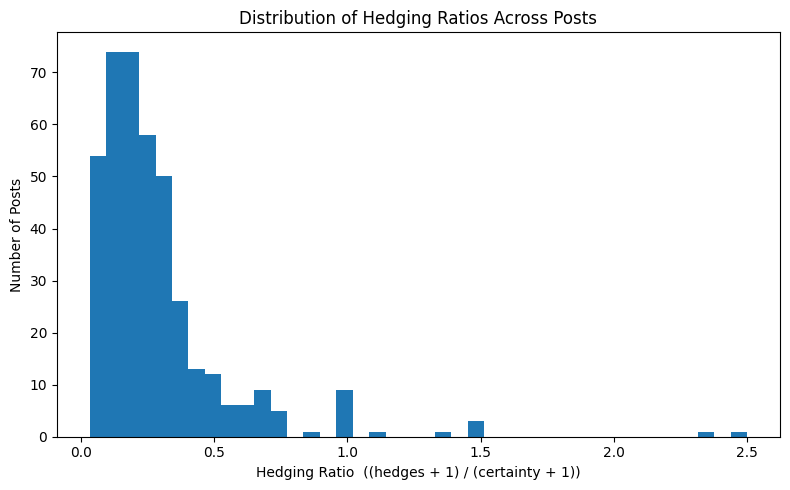

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# ---- file path -------------------------------------------------
INPUT_FILE = "compiled.csv"        # adjust if the CSV lives elsewhere

# ---- word lists ------------------------------------------------
HEDGERS = {
    "maybe", "might", "possibly", "perhaps", "could", "i think",
    "i believe", "not sure", "likely", "seems", "appears"
}
CERTAINTY = {
    "must", "shall", "is", "are", "cannot", "always", "never",
    "definitely", "clearly", "certainly"
}

WORD_RE = re.compile(r"[A-Za-z']+")          # simple tokeniser

def hedging_ratio(text: str) -> float:
    """
    Return (hedge_count + 1) / (certainty_count + 1).
    +1 avoids division-by-zero and smooths extremes.
    """
    if not isinstance(text, str):
        return 1.0
    tokens = [w.lower() for w in WORD_RE.findall(text)]
    h = sum(tok in HEDGERS   for tok in tokens)
    c = sum(tok in CERTAINTY for tok in tokens)
    return (h + 1) / (c + 1)

# ---- load, compute, plot --------------------------------------
df = pd.read_csv(INPUT_FILE)

TEXT_COLS = ["answer_body", "question_body"]       # change if needed
df["hedging_ratio"] = (
    df[TEXT_COLS]
    .fillna("")
    .agg(" ".join, axis=1)
    .apply(hedging_ratio)
)

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df["hedging_ratio"], bins=40)
plt.title("Distribution of Hedging Ratios Across Posts")
plt.xlabel("Hedging Ratio  ((hedges + 1) / (certainty + 1))")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


In [ ]:
# assumes you already have df with a `hedging_ratio` column
# -----------------------------------------------------------------
import numpy as np

# --- 1. classify -------------------------------------------------
def classify_hr(r):
    if r <= 0.8:
        return "Confident"
    elif r >= 1.2:
        return "Hedged"
    else:
        return "Neutral"

df["hedge_class"] = df["hedging_ratio"].apply(classify_hr)

# --- 2. descriptive stats ---------------------------------------
print("\n=== Hedging-Ratio Summary ===")
print(df["hedging_ratio"].describe(percentiles=[.05, .25, .5, .75, .95]))

print("\n=== Class Counts ===")
print(df["hedge_class"].value_counts())

# --- 3. peek at extremes ----------------------------------------
print("\nMost confident posts (lowest ratios):")
print(df.nsmallest(5, "hedging_ratio")[["post_id", "hedging_ratio"]])

print("\nMost hedged posts (highest ratios):")
print(df.nlargest(5, "hedging_ratio")[["post_id", "hedging_ratio"]])

# (optional) save the enriched DataFrame
df.to_csv("compiled_with_hedge_inference.csv", index=False)



=== Hedging-Ratio Summary ===
count    404.000000
mean       0.287278
std        0.273613
min        0.034483
5%         0.062500
25%        0.125000
50%        0.219807
75%        0.333333
95%        0.714286
max        2.500000
Name: hedging_ratio, dtype: float64

=== Class Counts ===
hedge_class
Confident    387
Neutral       11
Hedged         6
Name: count, dtype: int64

Most confident posts (lowest ratios):
     post_id  hedging_ratio
270     8407       0.034483
245     9387       0.035714
81    234526       0.038462
89    345318       0.038462
76    147120       0.040000

Most hedged posts (highest ratios):
     post_id  hedging_ratio
50    283207       2.500000
13       228       2.333333
39     34440       1.500000
137   235298       1.500000
387     2795       1.500000


In [ ]:
# unsupervised_accuracy_fixed.py
# ----------------------------------------------------------------
import re, pandas as pd, numpy as np
from pathlib import Path
from scipy.special import expit  # sigmoid

ANSWER_RE = re.compile(
    r"\[Answer ID:\s*(\d+),\s*Upvotes:\s*(\d+)\]\s*(.+?)(?=\s*\|\s*\[Answer ID:|\s*$)",
    re.S,
)

TLD_PATTERN = r"(?:com|org|net|io|gov|edu|info|co)"
URL_RE      = re.compile(rf"https?://\S+|\b\S+\.{TLD_PATTERN}\b", re.I)
WORD_RE     = re.compile(r"[A-Za-z']+")

HEDGERS   = {"maybe","might","possibly","perhaps","could","i think",
             "i believe","not sure","likely","seems","appears"}
CERTAINTY = {"must","shall","is","are","cannot","always","never",
             "definitely","clearly","certainly"}
DISCOURSE = {"because","for example","for instance","therefore","in summary"}

# ---------- helpers --------------------------------------------
def citation_flag(txt: str) -> int:
    return int(bool(URL_RE.search(txt)))

def hedging_ratio(txt: str) -> float:
    toks = [t.lower() for t in WORD_RE.findall(txt)]
    h, c = sum(t in HEDGERS for t in toks), sum(t in CERTAINTY for t in toks)
    return (h + 1) / (c + 1)

def discourse_flag(txt: str) -> int:
    markers = sum(1 for m in DISCOURSE if m in txt.lower())
    return int(markers >= 2 and txt.count(".") >= 2)

def expand_answers(row):
    """Yield answer dicts for one question row (uvcompiled schema)."""
    qid = row["question_id"]
    answers_blob = row["answers_with_upvotes"]
    answers_blob = answers_blob if isinstance(answers_blob, str) else ""
    for aid, up, body in ANSWER_RE.findall(answers_blob):
        yield {
            "question_id": int(qid),
            "answer_id":   int(aid),
            "upvotes":     int(up),
            "answer_text": body.strip(),
        }

# ---------- main ------------------------------------------------
def main(in_csv="uvcompiled.csv", out_csv="answers_with_scores.csv"):
    qdf = pd.read_csv(in_csv).fillna({"answers_with_upvotes": ""})

    # 1) explode to answer-level DataFrame
    records = [ans for _, row in qdf.iterrows() for ans in expand_answers(row)]
    adf = pd.DataFrame.from_records(records)

    # 2) features
    adf["citation_flag"]  = adf["answer_text"].apply(citation_flag)
    adf["hedging_ratio"]  = adf["answer_text"].apply(hedging_ratio)
    adf["conf_score"]     = 1 / adf["hedging_ratio"]          # higher = better
    adf["discourse_flag"] = adf["answer_text"].apply(discourse_flag)

    adf["upvote_z"] = (
        adf.groupby("question_id")["upvotes"]
           .transform(lambda s: (s - s.mean()) / (s.std(ddof=0) or 1))
    )
    adf["upvote_sigmoid"] = expit(adf["upvote_z"])

    # 3) scale confidence 0-1
    conf_min, conf_max = adf["conf_score"].min(), adf["conf_score"].max()
    adf["conf_scaled"] = (adf["conf_score"] - conf_min) / (conf_max - conf_min + 1e-9)

    # 4) composite score
    adf["accuracy_score"] = (
        0.40 * adf["citation_flag"]
      + 0.30 * adf["conf_scaled"]
      + 0.15 * adf["discourse_flag"]
      + 0.15 * adf["upvote_sigmoid"]
    )

    # 5) save
    cols = ["question_id","answer_id","upvotes",
            "citation_flag","hedging_ratio","discourse_flag",
            "upvote_z","accuracy_score","answer_text"]
    adf[cols].to_csv(out_csv, index=False)
    print(f"Saved {len(adf)} answers → {out_csv}")

if __name__ == "__main__":
    main()


Saved 1501 answers → answers_with_scores.csv


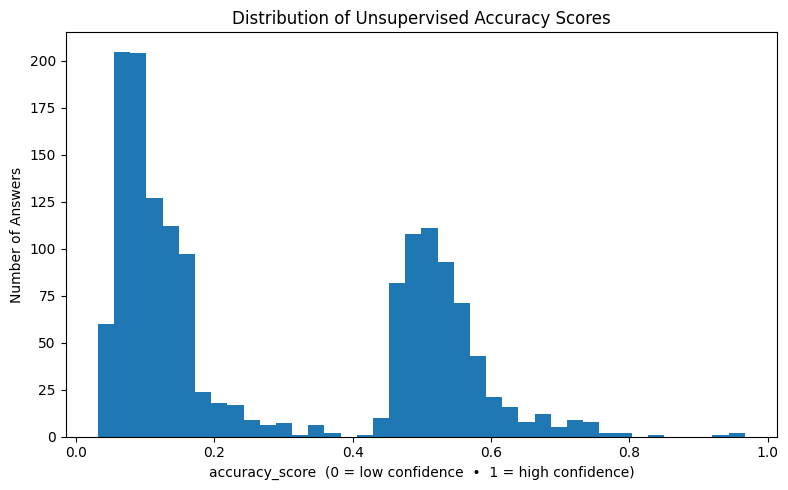


Top-5 highest-scoring answers:
      question_id  answer_id  accuracy_score
1045         2735       4206        0.966622
1356         2735       4206        0.966622
179        323175     323183        0.923761
822         40373      40610        0.846685
141        234511     234526        0.796795

Top-5 lowest-scoring answers:
     question_id  answer_id  accuracy_score
630       107353     108623        0.031900
695       147894     147960        0.037028
841        57529      57530        0.037028
62         87490      87498        0.038902
905        79585     199980        0.039904


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the file you just created
df = pd.read_csv("answers_with_scores.csv")     # adjust path if needed

# 2) Plot a histogram of the accuracy scores
plt.figure(figsize=(8, 5))
plt.hist(df["accuracy_score"], bins=40)
plt.title("Distribution of Unsupervised Accuracy Scores")
plt.xlabel("accuracy_score  (0 = low confidence  •  1 = high confidence)")
plt.ylabel("Number of Answers")
plt.tight_layout()
plt.show()

# (optional) inspect top & bottom answers
print("\nTop-5 highest-scoring answers:")
print(df.nlargest(5, "accuracy_score")[["question_id","answer_id","accuracy_score"]])

print("\nTop-5 lowest-scoring answers:")
print(df.nsmallest(5, "accuracy_score")[["question_id","answer_id","accuracy_score"]])


In [ ]:
# unsupervised_accuracy_fixed.py
# ----------------------------------------------------------------
import re, pandas as pd, numpy as np
from pathlib import Path
from scipy.special import expit  # sigmoid

ANSWER_RE = re.compile(
    r"\[Answer ID:\s*(\d+),\s*Upvotes:\s*(\d+)\]\s*(.+?)(?=\s*\|\s*\[Answer ID:|\s*$)",
    re.S,
)

TLD_PATTERN = r"(?:com|org|net|io|gov|edu|info|co)"
URL_RE      = re.compile(rf"https?://\S+|\b\S+\.{TLD_PATTERN}\b", re.I)
WORD_RE     = re.compile(r"[A-Za-z']+")

HEDGERS   = {"maybe","might","possibly","perhaps","could","i think",
             "i believe","not sure","likely","seems","appears"}
CERTAINTY = {"must","shall","is","are","cannot","always","never",
             "definitely","clearly","certainly"}
DISCOURSE = {"because","for example","for instance","therefore","in summary"}

# ---------- helpers --------------------------------------------
def citation_flag(txt: str) -> int:
    return int(bool(URL_RE.search(txt)))

def hedging_ratio(txt: str) -> float:
    toks = [t.lower() for t in WORD_RE.findall(txt)]
    h, c = sum(t in HEDGERS for t in toks), sum(t in CERTAINTY for t in toks)
    return (h + 1) / (c + 1)

def discourse_flag(txt: str) -> int:
    markers = sum(1 for m in DISCOURSE if m in txt.lower())
    return int(markers >= 2 and txt.count(".") >= 2)

def expand_answers(row):
    """Yield answer dicts for one question row (uvcompiled schema)."""
    qid = row["question_id"]
    answers_blob = row["answers_with_upvotes"]
    answers_blob = answers_blob if isinstance(answers_blob, str) else ""
    for aid, up, body in ANSWER_RE.findall(answers_blob):
        yield {
            "question_id": int(qid),
            "answer_id":   int(aid),
            "upvotes":     int(up),
            "answer_text": body.strip(),
        }

# ---------- main ------------------------------------------------
def main(in_csv="uvcompiled.csv", out_csv="answers_with_scores.csv"):
    qdf = pd.read_csv(in_csv).fillna({"answers_with_upvotes": ""})

    # 1) explode to answer-level DataFrame
    records = [ans for _, row in qdf.iterrows() for ans in expand_answers(row)]
    adf = pd.DataFrame.from_records(records)

    # 2) features
    adf["citation_flag"]  = adf["answer_text"].apply(citation_flag)
    adf["hedging_ratio"]  = adf["answer_text"].apply(hedging_ratio)
    adf["conf_score"]     = 1 / adf["hedging_ratio"]          # higher = better
    adf["discourse_flag"] = adf["answer_text"].apply(discourse_flag)

    adf["upvote_z"] = (
        adf.groupby("question_id")["upvotes"]
           .transform(lambda s: (s - s.mean()) / (s.std(ddof=0) or 1))
    )
    adf["upvote_sigmoid"] = expit(adf["upvote_z"])

    # 3) scale confidence 0-1
    conf_min, conf_max = adf["conf_score"].min(), adf["conf_score"].max()
    adf["conf_scaled"] = (adf["conf_score"] - conf_min) / (conf_max - conf_min + 1e-9)

    # 4) composite score
    adf["accuracy_score"] = (
        0.35 * adf["citation_flag"]
      + 0.15 * adf["conf_scaled"]
      + 0.15 * adf["discourse_flag"]
      + 0.35 * adf["upvote_sigmoid"]
    )

    # 5) save
    cols = ["question_id","answer_id","upvotes",
            "citation_flag","hedging_ratio","discourse_flag",
            "upvote_z","accuracy_score","answer_text"]
    adf[cols].to_csv(out_csv, index=False)
    print(f"Saved {len(adf)} answers → {out_csv}")

if __name__ == "__main__":
    main()


Saved 1501 answers → answers_with_scores.csv


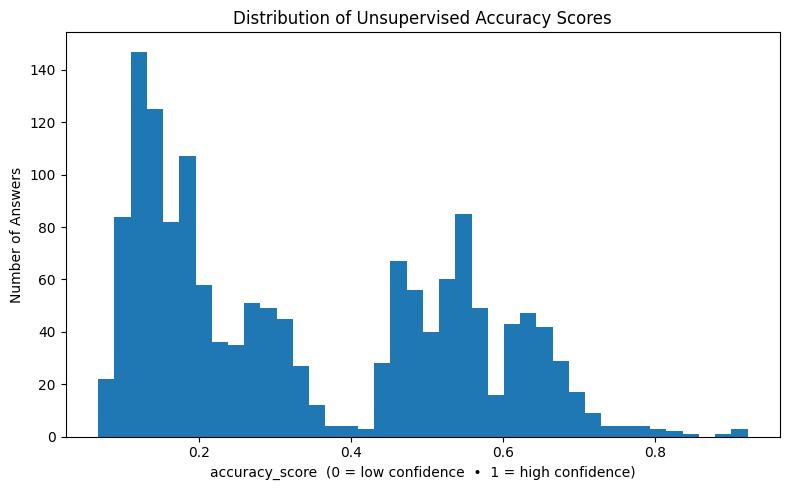


Top-5 highest-scoring answers:
      question_id  answer_id  accuracy_score
1045         2735       4206        0.922119
1356         2735       4206        0.922119
822         40373      40610        0.914915
179        323175     323183        0.887922
1031        10365      12979        0.841807

Top-5 lowest-scoring answers:
      question_id  answer_id  accuracy_score
62          87490      87498        0.067268
1282         4990       5015        0.067479
630        107353     108623        0.069732
695        147894     147960        0.072296
841         57529      57530        0.072296


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the file you just created
df = pd.read_csv("answers_with_scores.csv")     # adjust path if needed

# 2) Plot a histogram of the accuracy scores
plt.figure(figsize=(8, 5))
plt.hist(df["accuracy_score"], bins=40)
plt.title("Distribution of Unsupervised Accuracy Scores")
plt.xlabel("accuracy_score  (0 = low confidence  •  1 = high confidence)")
plt.ylabel("Number of Answers")
plt.tight_layout()
plt.show()

# (optional) inspect top & bottom answers
print("\nTop-5 highest-scoring answers:")
print(df.nlargest(5, "accuracy_score")[["question_id","answer_id","accuracy_score"]])

print("\nTop-5 lowest-scoring answers:")
print(df.nsmallest(5, "accuracy_score")[["question_id","answer_id","accuracy_score"]])


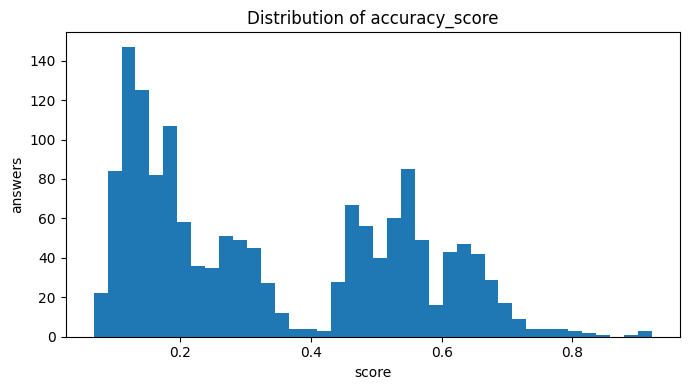

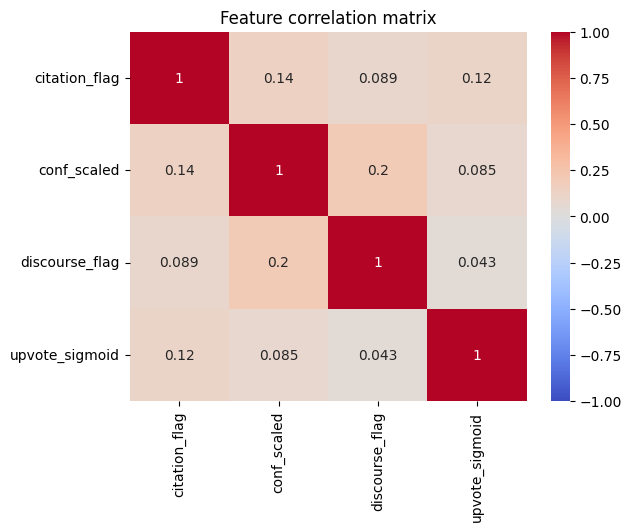

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

df = pd.read_csv("answers_with_scores.csv")

# ── rebuild missing convenience columns ─────────────────────────
if "conf_scaled" not in df.columns:
    # 1 / hedging_ratio  →  min-max 0-1
    conf = 1 / df["hedging_ratio"]
    df["conf_scaled"] = (conf - conf.min()) / (conf.max() - conf.min() + 1e-9)

if "upvote_sigmoid" not in df.columns:
    df["upvote_sigmoid"] = expit(df["upvote_z"])

# ── plot distribution of accuracy scores ────────────────────────
plt.figure(figsize=(7,4))
plt.hist(df["accuracy_score"], bins=40)
plt.title("Distribution of accuracy_score"); plt.xlabel("score"); plt.ylabel("answers")
plt.tight_layout(); plt.show()

# ── correlation heat-map of the four features ───────────────────
features = ["citation_flag", "conf_scaled", "discourse_flag", "upvote_sigmoid"]
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature correlation matrix"); plt.show()


In [ ]:
from scipy.stats import spearmanr

base = df["accuracy_score"]
for feat in features:
    temp = base - df[feat] * [0.35,0.15,0.15,0.35][features.index(feat)]
    rho,_ = spearmanr(base, temp)
    print(f"Drop {feat:15s} → Spearman ρ = {rho:.88f}")


Drop citation_flag   → Spearman ρ = 0.6520247271138795985834235580114182084798812866210937500000000000000000000000000000000000
Drop conf_scaled     → Spearman ρ = 0.9905630056421244056252817244967445731163024902343750000000000000000000000000000000000000
Drop discourse_flag  → Spearman ρ = 0.9874315300225933178523973765550181269645690917968750000000000000000000000000000000000000
Drop upvote_sigmoid  → Spearman ρ = 0.8191450190292957067583756725070998072624206542968750000000000000000000000000000000000000


In [ ]:
# unsupervised_accuracy_fixed.py
# ----------------------------------------------------------------
import re, pandas as pd, numpy as np
from pathlib import Path
from scipy.special import expit  # sigmoid

ANSWER_RE = re.compile(
    r"\[Answer ID:\s*(\d+),\s*Upvotes:\s*(\d+)\]\s*(.+?)(?=\s*\|\s*\[Answer ID:|\s*$)",
    re.S,
)

TLD_PATTERN = r"(?:com|org|net|io|gov|edu|info|co)"
URL_RE      = re.compile(rf"https?://\S+|\b\S+\.{TLD_PATTERN}\b", re.I)
WORD_RE     = re.compile(r"[A-Za-z']+")

HEDGERS   = {"maybe","might","possibly","perhaps","could","i think",
             "i believe","not sure","likely","seems","appears"}
CERTAINTY = {"must","shall","is","are","cannot","always","never",
             "definitely","clearly","certainly"}
DISCOURSE = {"because","for example","for instance","therefore","in summary"}

# ---------- helpers --------------------------------------------
def citation_flag(txt: str) -> int:
    return int(bool(URL_RE.search(txt)))

def hedging_ratio(txt: str) -> float:
    toks = [t.lower() for t in WORD_RE.findall(txt)]
    h, c = sum(t in HEDGERS for t in toks), sum(t in CERTAINTY for t in toks)
    return (h + 1) / (c + 1)

def discourse_flag(txt: str) -> int:
    markers = sum(1 for m in DISCOURSE if m in txt.lower())
    return int(markers >= 2 and txt.count(".") >= 2)

def expand_answers(row):
    """Yield answer dicts for one question row (uvcompiled schema)."""
    qid = row["question_id"]
    answers_blob = row["answers_with_upvotes"]
    answers_blob = answers_blob if isinstance(answers_blob, str) else ""
    for aid, up, body in ANSWER_RE.findall(answers_blob):
        yield {
            "question_id": int(qid),
            "answer_id":   int(aid),
            "upvotes":     int(up),
            "answer_text": body.strip(),
        }

# ---------- main ------------------------------------------------
def main(in_csv="uvcompiled.csv", out_csv="newanswers_with_scores.csv"):
    qdf = pd.read_csv(in_csv).fillna({"answers_with_upvotes": ""})

    # 1) explode to answer-level DataFrame
    records = [ans for _, row in qdf.iterrows() for ans in expand_answers(row)]
    adf = pd.DataFrame.from_records(records)

    # 2) features
    adf["citation_flag"]  = adf["answer_text"].apply(citation_flag)
    adf["hedging_ratio"]  = adf["answer_text"].apply(hedging_ratio)
    adf["conf_score"]     = 1 / adf["hedging_ratio"]          # higher = better
    adf["discourse_flag"] = adf["answer_text"].apply(discourse_flag)

    adf["upvote_z"] = (
        adf.groupby("question_id")["upvotes"]
           .transform(lambda s: (s - s.mean()) / (s.std(ddof=0) or 1))
    )
    adf["upvote_sigmoid"] = expit(adf["upvote_z"])

    # 3) scale confidence 0-1
    conf_min, conf_max = adf["conf_score"].min(), adf["conf_score"].max()
    adf["conf_scaled"] = (adf["conf_score"] - conf_min) / (conf_max - conf_min + 1e-9)

    # 4) composite score
    adf["accuracy_score"] = (
        0.30 * adf["citation_flag"]
      + 0.25 * adf["conf_scaled"]
      + 0.25 * adf["discourse_flag"]
      + 0.20 * adf["upvote_sigmoid"]
    )

    # 5) save
    cols = ["question_id","answer_id","upvotes",
            "citation_flag","hedging_ratio","discourse_flag",
            "upvote_z","accuracy_score","answer_text"]
    adf[cols].to_csv(out_csv, index=False)
    print(f"Saved {len(adf)} answers → {out_csv}")

if __name__ == "__main__":
    main()


Saved 1501 answers → newanswers_with_scores.csv


In [ ]:
from scipy.stats import spearmanr

base = df["accuracy_score"]
for feat in features:
    temp = base - df[feat] * [0.35,0.15,0.15,0.35][features.index(feat)]
    rho,_ = spearmanr(base, temp)
    print(f"Drop {feat:15s} → Spearman ρ = {rho:.88f}")


Drop citation_flag   → Spearman ρ = 0.6520247271138795985834235580114182084798812866210937500000000000000000000000000000000000
Drop conf_scaled     → Spearman ρ = 0.9905630056421244056252817244967445731163024902343750000000000000000000000000000000000000
Drop discourse_flag  → Spearman ρ = 0.9874315300225933178523973765550181269645690917968750000000000000000000000000000000000000
Drop upvote_sigmoid  → Spearman ρ = 0.8191450190292957067583756725070998072624206542968750000000000000000000000000000000000000


In [ ]:
from scipy.stats import kendalltau
tau,_ = kendalltau(df["accuracy_score"], df["upvote_z"])
print("Kendall τ with up-vote rank:", tau)


Kendall τ with up-vote rank: 0.48444297187608915
